## **HOMEWORK 1.1: Social Network Connections (BFS - Shortest Path)** <br> <br>

Given a social network where people are nodes and frienships are edges, find the shortest path between two specific people

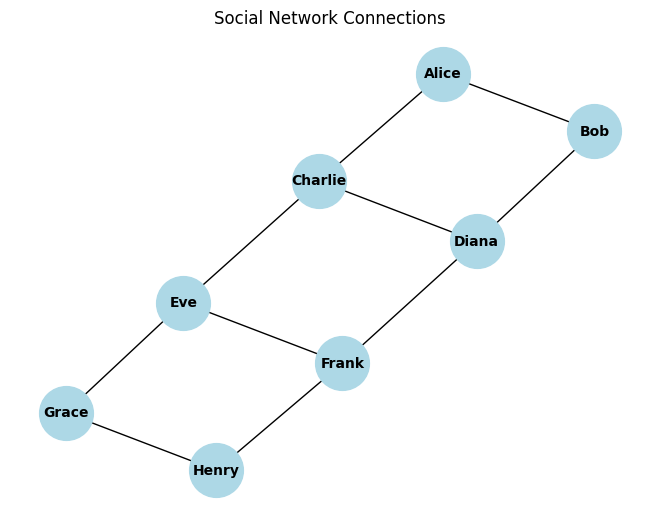

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
 
social_network = nx.Graph()
people = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Grace', 'Henry']
social_network.add_nodes_from(people)

#Add friendships (edges) as a list of tuples
friendships = [
    ('Alice', 'Bob'), ('Alice', 'Charlie'), ('Bob', 'Diana'), 
    ('Charlie', 'Diana'), ('Charlie', 'Eve'), ('Diana', 'Frank'),
    ('Eve', 'Frank'), ('Eve', 'Grace'), ('Frank', 'Henry'), ('Grace', 'Henry')
 ]

social_network.add_edges_from(friendships)

#Visualize the social network

pos = nx.spring_layout(social_network, seed = 3)
nx.draw(social_network, pos, with_labels = True, node_color = 'lightblue', node_size = 1500, font_size = 10, font_weight = 'bold')
plt.title("Social Network Connections")
plt.show()

In [2]:
#Implement BFS for searching
def find_shortest_path_bfs(graph, start, end):
    visited = set()
    queue = deque([start])
    visited.add(start)

    parent = {start : None}
    
    while queue:
        current = queue.popleft()

        #If it's the end, it's time to reconstruct the path
        if current == end:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            
            path.reverse()
            return path
        
        #If current it's not the end, explore all the neighbors
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

                parent[neighbor] = current


    #If end not found, than there is no path
    return None
                


Shortest path from Alice to Henry: Alice -> Bob -> Diana -> Frank -> Henry
Degrees of separation: 4


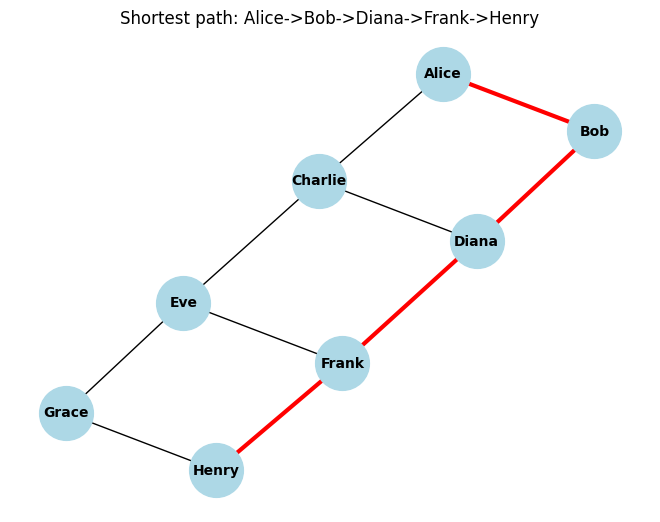

In [3]:
#Test the funcion
start_person = 'Alice'
end_person = 'Henry'
path = find_shortest_path_bfs(social_network, start_person, end_person)

if path:
    print(f"Shortest path from {start_person} to {end_person}: {' -> ' .join(path)}")
    print(f"Degrees of separation: {len(path) - 1}")

    #Visualize the path

    #Turn the list of string (A, B, C, D) into [(A, B), (B, C), (C, D)]
    path_edges = [(path[i], path[i + 1]) for i in range (len(path) - 1)]
    nx.draw(social_network, pos, with_labels = True, node_color = 'lightblue', node_size = 1500, font_size = 10, font_weight = 'bold')
    nx.draw_networkx_edges(social_network, pos, edgelist= path_edges, edge_color = 'red', width = 3)

    plt.title(f"Shortest path: {'->' .join(path)}")
    plt.show()
else:
    print(f"No connection found between {start_person} and {end_person}")
